In [3]:
'''
my project is knowing about how many person have diabeties and predicted
'''

'\nmy project is knowing about how many person have diabeties and predicted\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("diabeties.csv")
df

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df["target"].value_counts()

target
0    500
1    268
Name: count, dtype: int64

In [8]:
df.describe()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


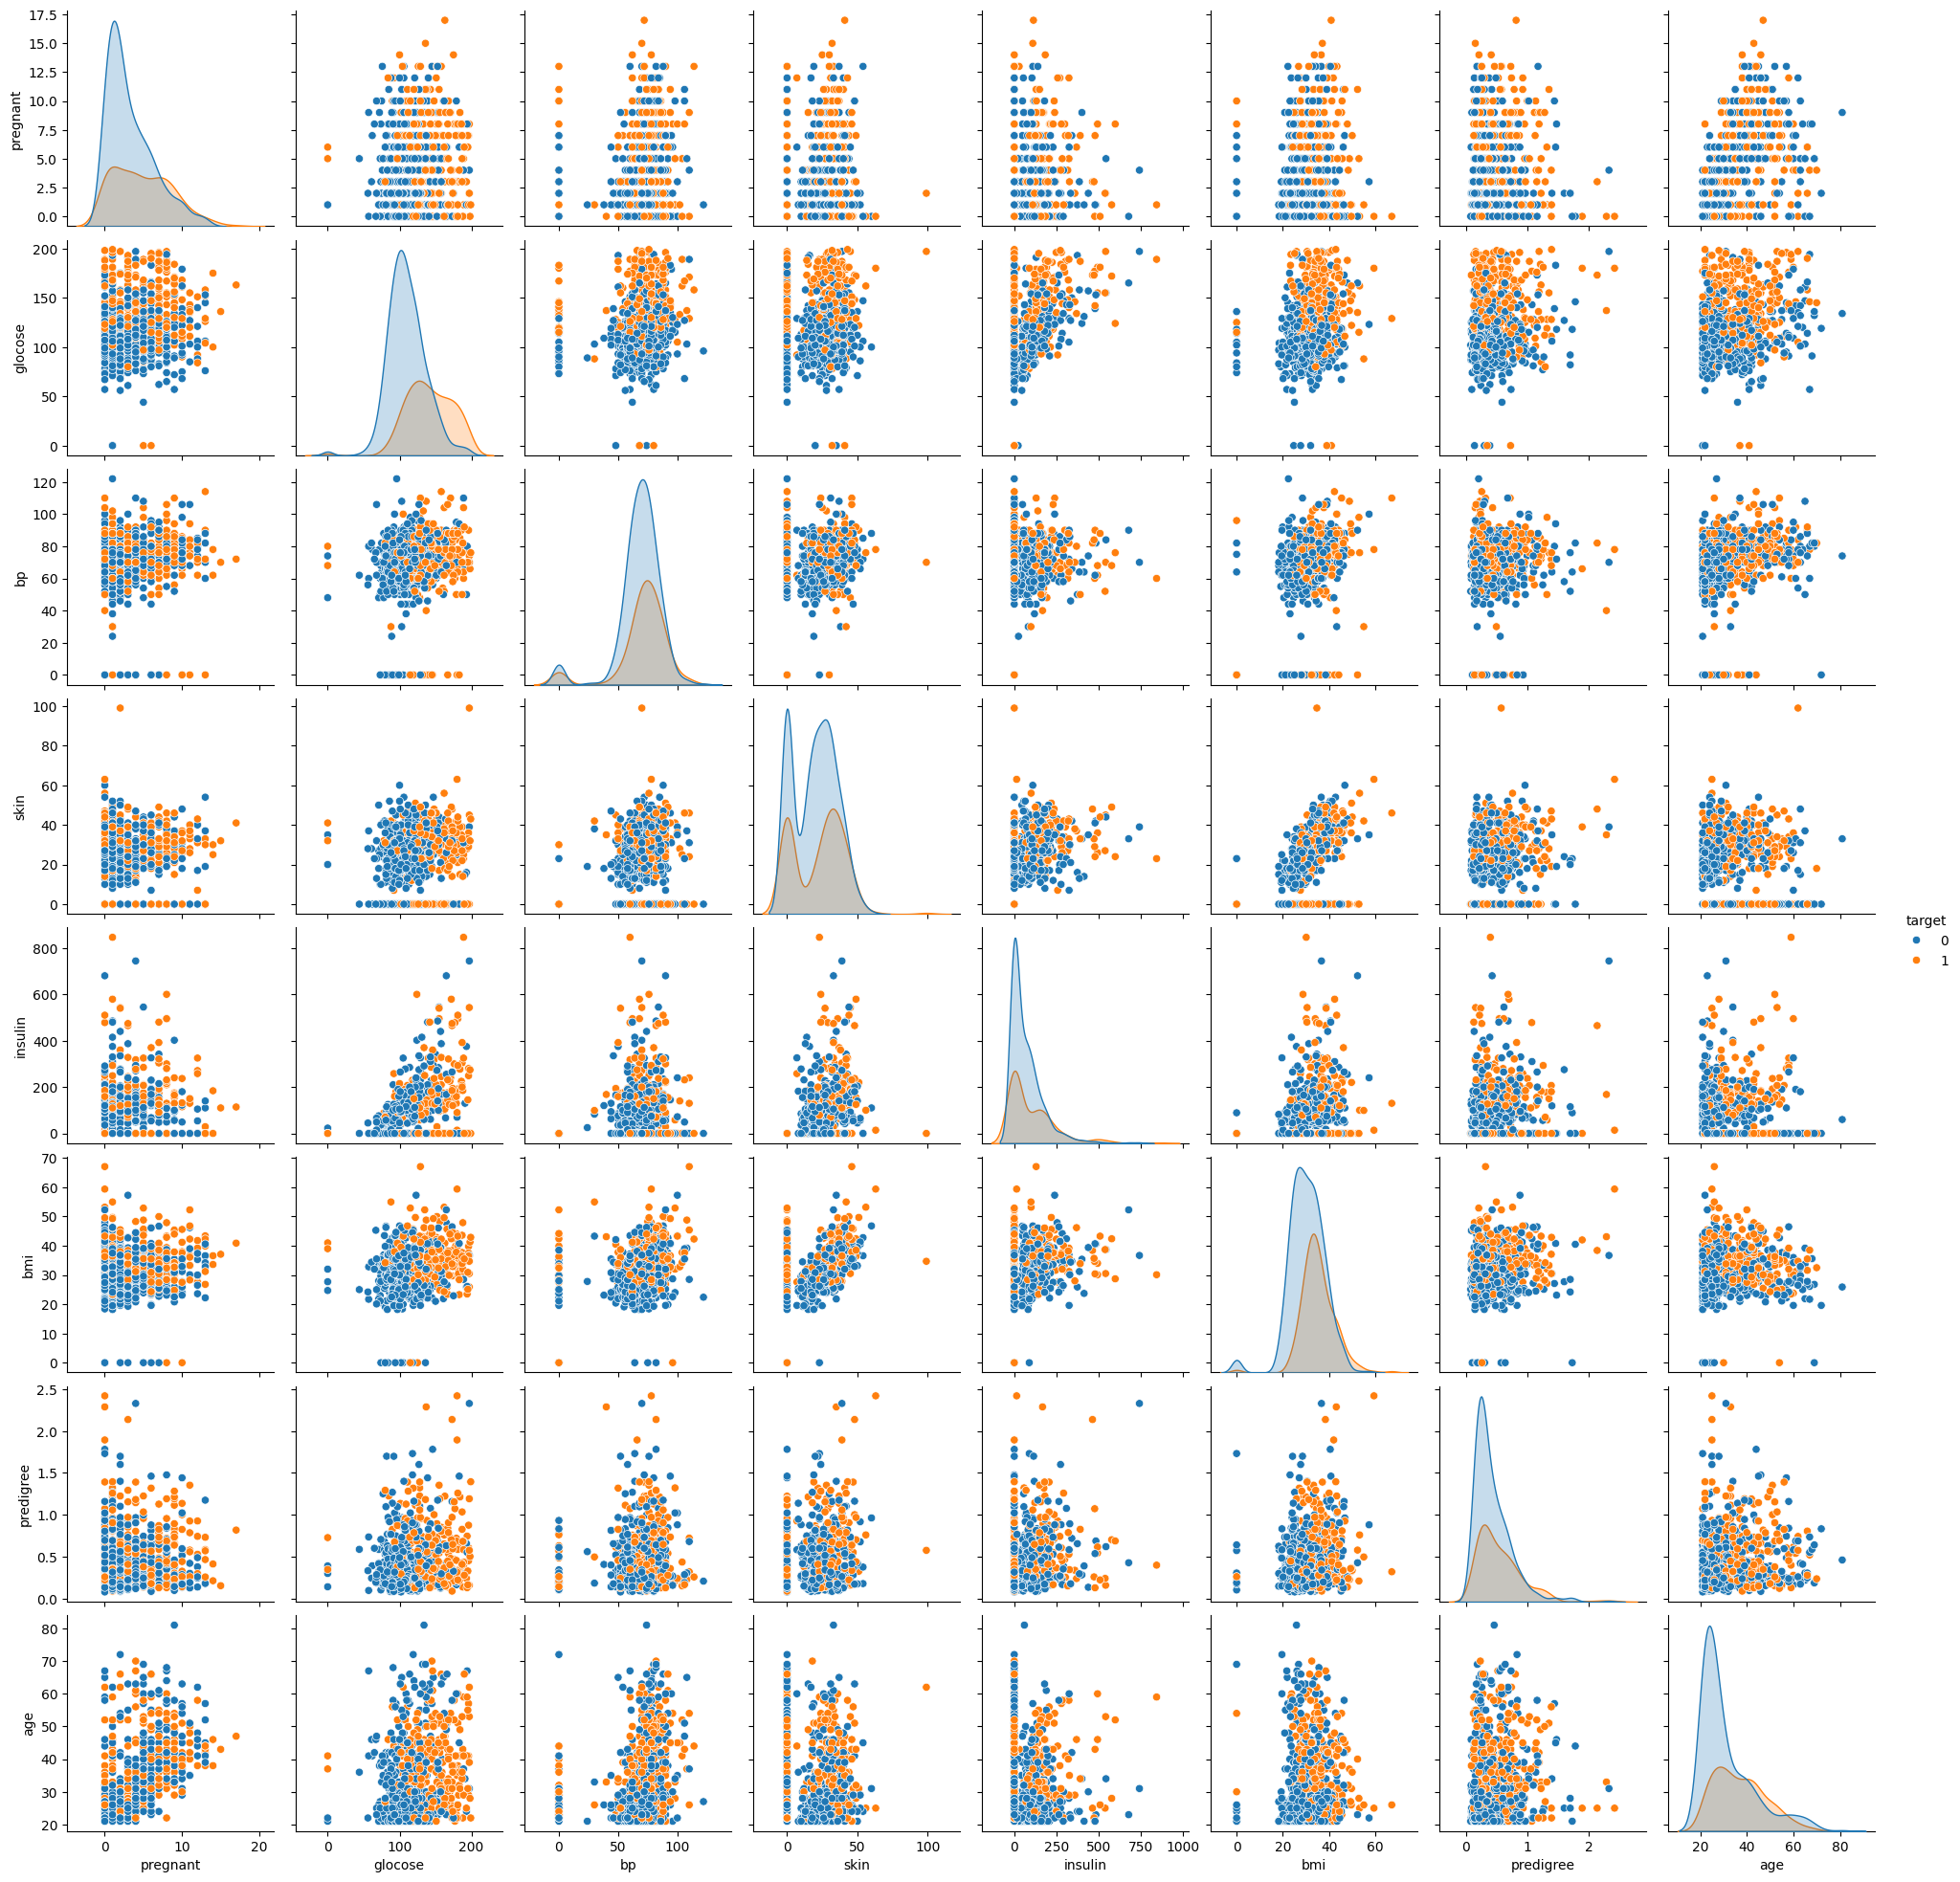

In [9]:
sns.pairplot(df,hue="target")

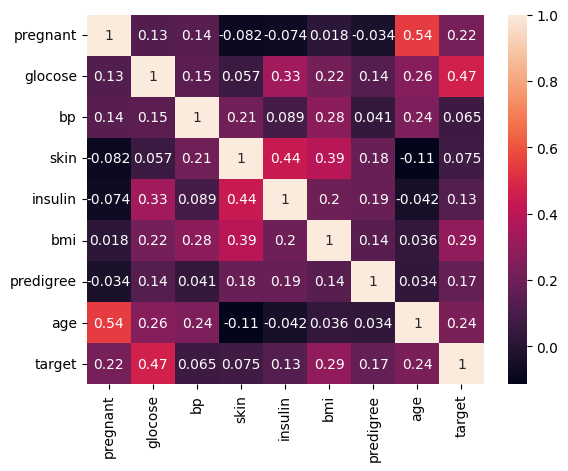

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: xlabel='target', ylabel='count'>

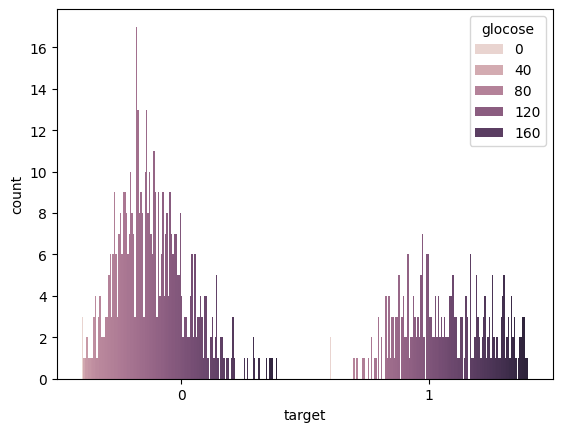

In [11]:
sns.countplot(data=df,x="target",hue="glocose")

In [12]:
x = df.iloc[:,:-1]
y = df["target"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,
                                             test_size=0.22,random_state=42)
print("Training Data Shape",xtrain.shape,ytrain.shape)
print("Testing Data Shape",xtest.shape,ytest.shape)

Training Data Shape (599, 8) (599,)
Testing Data Shape (169, 8) (169,)


In [15]:

from sklearn.linear_model import LogisticRegression


In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [18]:
lr.score(xtrain, ytrain)*100

76.96160267111853

In [19]:
lr.score(xtest, ytest)*100

78.69822485207101

In [20]:
ypred=lr.predict(xtest)

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [22]:
roc_auc_score(ypred,ytest)

0.7674311926605505

In [23]:
 from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components=pca.fit_transform(x,y)

In [24]:
print(xtrain.shape,xtest.shape)
print(xtrain.shape,xtest.shape)

(599, 8) (169, 8)
(599, 8) (169, 8)


In [25]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc_score(ypred,ytest)

0.7674311926605505

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy : {ac}")
print(f"Confusion Matrix :\n{cm}")
print(f"Classification Report : \n{cr}")

Accuracy : 0.7869822485207101
Confusion Matrix :
[[91 18]
 [18 42]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.70      0.70      0.70        60

    accuracy                           0.79       169
   macro avg       0.77      0.77      0.77       169
weighted avg       0.79      0.79      0.79       169

